## Digits Recognizer: Exploring MNIST Dataset

- The MNIST dataset is a classic benchmark dataset in the field of machine learning and computer vision. It stands for Modified National Institute of Standards and Technology database. This dataset consists of a collection of handwritten digits that have been formatted in a consistent manner to facilitate machine learning algorithms.

Here are some key characteristics of the MNIST dataset:

- Size and Composition: MNIST contains a total of 70,000 images of handwritten digits. These images are grayscale and have a resolution of 28x28 pixels.

- Labeling: Each image in the dataset is associated with a label that corresponds to the digit it represents (0 to 9). For instance, an image might depict the digit "5", and its label would be 5.

- Training and Testing Split: Typically, the dataset is divided into two parts: a training set and a test set. The training set consists of 60,000 images, while the test set contains 10,000 images. This split helps evaluate the performance of machine learning models on previously unseen data.

- Usage: MNIST is commonly used as a benchmark dataset for developing and testing machine learning algorithms, particularly for image classification tasks. It's often used to introduce beginners to the concepts of image processing, deep learning, and classification algorithms.

- Challenges: Despite its popularity, MNIST has become relatively simple for modern machine learning models due to its small size and simplicity. Many new algorithms surpass human-level performance on this dataset.

- Accessibility: The dataset is widely available and can be accessed through various machine learning libraries, such as TensorFlow and PyTorch, or directly from the MNIST website.

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(X_train_full,y_train_full), (X_test,y_test) = mnist.load_data()


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


<IPython.core.display.Javascript object>

In [11]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

X_train shape: (48000, 28, 28)
X_val shape: (12000, 28, 28)
X_test shape: (10000, 28, 28)


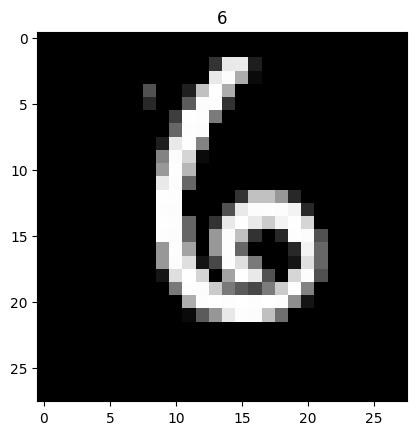

In [12]:
plt.imshow(X_train[10000],cmap='gray')
plt.title(y_train[10000])
plt.show()

## Creating model

In [13]:
from keras.layers import Dense,Conv2D,AveragePooling2D,Flatten
from keras.models import Sequential

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(filters = 4,kernel_size = (5,5),activation='relu',input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 4,kernel_size = (7,7),activation='relu',input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=10,activation='softmax'))


In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 4)         104       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 4)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 4)           788       
                                                                 
 average_pooling2d_1 (Averag  (None, 3, 3, 4)          0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 36)                0         
                                                                 
 dense (Dense)               (None, 10)                3

In [19]:
# Train the model and collect history
history = model.fit(X_train,y_train, epochs=10, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/10
4800/4800 [==============================] - 26s 5ms/step - loss: 0.1989 - acc: 0.9387 - val_loss: 0.1762 - val_acc: 0.9478
Epoch 2/10
4800/4800 [==============================] - 25s 5ms/step - loss: 0.1490 - acc: 0.9530 - val_loss: 0.1293 - val_acc: 0.9613
Epoch 3/10
4800/4800 [==============================] - 28s 6ms/step - loss: 0.1269 - acc: 0.9604 - val_loss: 0.1146 - val_acc: 0.9651
Epoch 4/10
4800/4800 [==============================] - 27s 6ms/step - loss: 0.1131 - acc: 0.9654 - val_loss: 0.1264 - val_acc: 0.9611
Epoch 5/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.1064 - acc: 0.9671 - val_loss: 0.1303 - val_acc: 0.9598
Epoch 6/10
4800/4800 [==============================] - 27s 6ms/step - loss: 0.1018 - acc: 0.9681 - val_loss: 0.1034 - val_acc: 0.9672
Epoch 7/10
4800/4800 [==============================] - 27s 6ms/step - loss: 0.0984 - acc: 0.9699 - val_loss: 0.1138 - val_acc: 0.9657
Epoch 8/10
4800/4800 [==============================] -

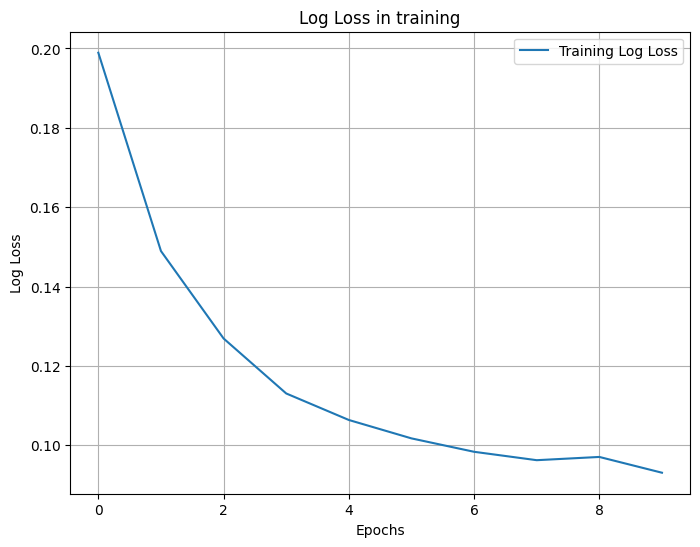

In [25]:
# Plotting the log loss (categorical cross-entropy)
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Log Loss')
plt.title('Log Loss in training')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()


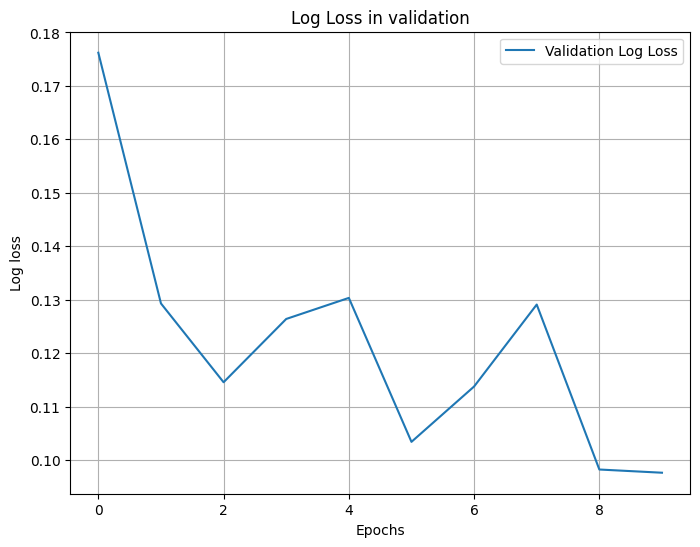

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['val_loss'], label='Validation Log Loss')
plt.title('Log Loss in validation')
plt.xlabel('Epochs')
plt.ylabel('Log loss')
plt.legend()
plt.grid(True)
plt.show()

## Testing

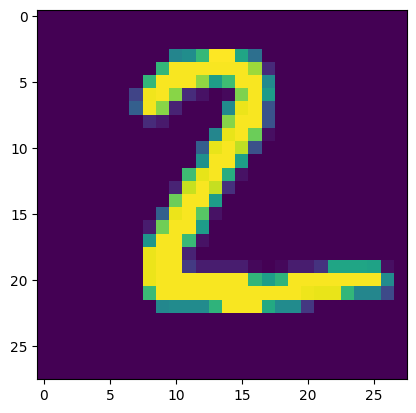

In [12]:
plt.imshow(X_test[1])

In [13]:
#X_test = X_test.reshape((-1,28,28,1))
test = X_test[1].reshape(-1,28,28,1)

In [14]:
result = model.predict(test)
predicted_class = np.argmax(result)
print(predicted_class)

1/1 [==============================] - 0s 130ms/step
2


In [28]:
# saving model in local disk
model.save('./Mymodel.h5')

In [29]:
from keras.models import load_model
model = load_model('./Mymodel.h5')

Text(0.5, 1.0, '7')

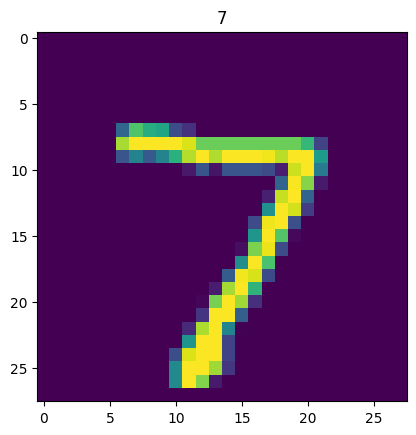

In [30]:
plt.imshow(X_test[0])
plt.title(y_test[0])

In [31]:
x = model.predict(X_test[0].reshape(1,28,28,1))

1/1 [==============================] - 0s 80ms/step


In [32]:
np.argmax(x)

7